y = D
ignore NO and YR
Run grid search for logistic regression and get best params and best score with roc auc

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression,ElasticNet
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve


In [4]:
bank = pd.read_csv("F:\PML\Cases\Bankruptcy\Bankruptcy.csv")
bank.head()

,NO,D,YR,R1,R2,R3,R4,R5,R6,R7,...,R15,R16,R17,R18,R19,R20,R21,R22,R23,R24
0,1,0,78,0.23,0.08,0.02,0.03,0.46,0.12,0.19,...,0.05,0.57,0.15,0.23,3.56,0.26,1.55,0.43,0.11,0.17
1,2,0,77,0.19,0.07,0.09,0.12,0.02,0.02,0.03,...,0.09,0.12,0.16,0.22,3.78,1.29,1.40,0.06,0.07,0.10
2,3,0,72,0.07,0.02,0.03,0.05,0.06,0.10,0.14,...,-0.03,0.02,0.02,0.04,13.29,1.61,1.43,0.03,0.05,0.07
3,4,0,80,0.07,0.03,0.04,0.04,0.04,0.06,0.06,...,-0.02,0.01,0.02,0.02,5.36,1.30,1.12,-0.06,-0.08,-0.09
4,5,0,81,0.09,0.02,0.03,0.04,0.06,0.08,0.11,...,0.02,0.07,0.10,0.14,7.74,1.48,1.41,0.03,0.04,0.06


In [6]:
X = bank.drop(['D','NO','YR'], axis=1)
y = bank['D']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=23,stratify=y)

In [13]:
lr = LogisticRegression(penalty=None)
lr.fit(X_train,y_train)
y_pred_prob = lr.predict_proba(X_test)


C:\Users\dbda\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
y_pred_prob = lr.predict_proba(X_test)
y_pred_prob = y_pred_prob[:,1]

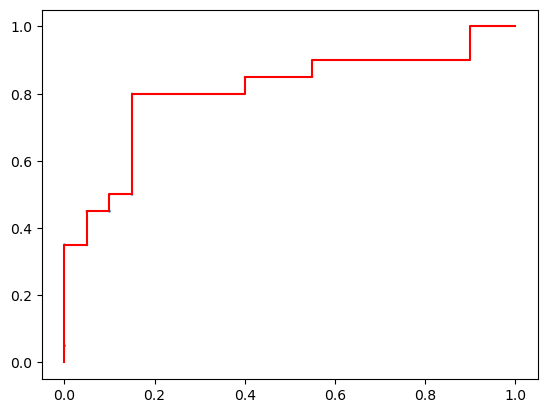

0.8075


In [18]:
fpr, tpr, thresh  = roc_curve(y_test, y_pred_prob)
plt.scatter(fpr, tpr, thresh)
plt.plot(fpr,tpr,c='red')
plt.xlabel = ("1 - Specificity")
plt.ylabel = ("Sensitivity")
plt.show()
print(roc_auc_score(y_test, y_pred_prob))

In [19]:
from sklearn.model_selection import StratifiedKFold
params = {'penalty':[None, 'l1', 'l2', 'elasticnet']}
lr = LogisticRegression(solver='saga', l1_ratio=0.5)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state = 23)



In [23]:
gcv = GridSearchCV(lr, param_grid=params, cv=kfold, scoring='roc_auc')
gcv.fit(X,y)

C:\Users\dbda\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(
C:\Users\dbda\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(
C:\Users\dbda\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.war

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=23, shuffle=True),
             estimator=LogisticRegression(l1_ratio=0.5, solver='saga'),
             param_grid={'penalty': [None, 'l1', 'l2', 'elasticnet']},
             scoring='roc_auc')

In [24]:
print(gcv.best_params_)
print(gcv.best_score_)


{'penalty': None}
0.7776838546069316
